<a href="https://colab.research.google.com/github/abdulxs/Advanced-Deep-Learning-Projects/blob/main/Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Yusuf Abdulgafar

Email: abyusuf@uef.fi

Aim: To create a Convolutional Neural Network (CNN) and implement Sigmoid, Hyperbolic Tangent, ReLU, ELU and SELU node function (activation function) on the MNIST and CIFAR10 dataset, plot training loss and validation loss by epoch, training accuracy and validation accuracy by epoch. Then deduce which node function is the most suitable one for MNIST and CIFAR10 dataset respectively.

MNIST

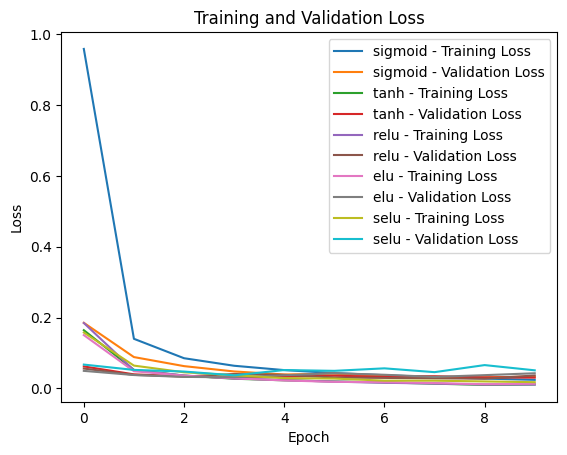

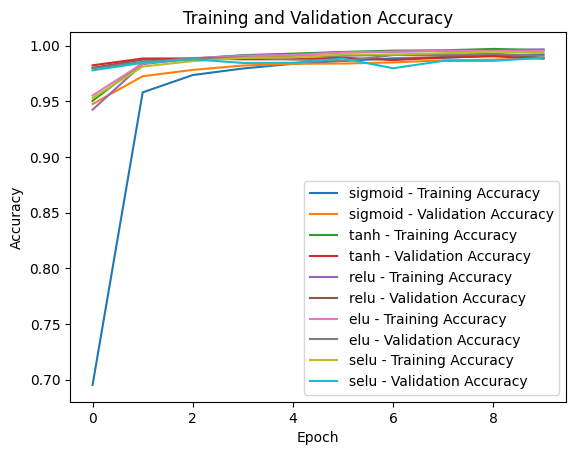

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN architecture
def build_cnn(activation_function):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_function))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Train the model with different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']

for activation_function in activation_functions:
    model = build_cnn(activation_function)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

    # Plot training loss and validation loss
    plt.plot(history.history['loss'], label=f'{activation_function} - Training Loss')
    plt.plot(history.history['val_loss'], label=f'{activation_function} - Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
for activation_function in activation_functions:
    model = build_cnn(activation_function)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

    plt.plot(history.history['accuracy'], label=f'{activation_function} - Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{activation_function} - Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


As observed from the training and validation accuracy, tanh and ELU seemed to perform best on MNIST dataset, while the other node functions also seem to have a similar performance level on the dataset.

CIFAR-10

170498071/170498071 [==============================] - 2s 0us/step


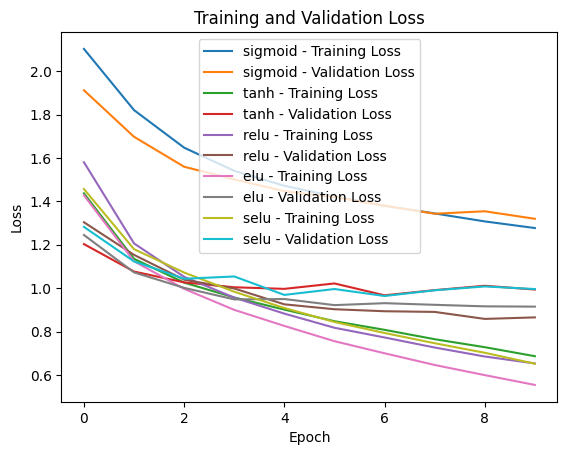

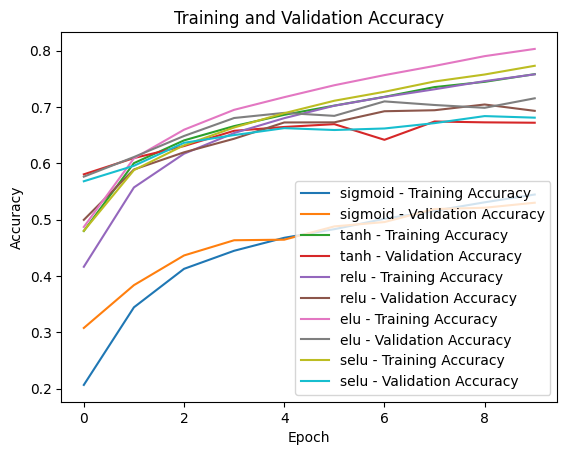

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define the CNN architecture
def build_cnn(activation_function):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_function))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Train the model with different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']

for activation_function in activation_functions:
    model = build_cnn(activation_function)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

    # Plot training loss and validation loss
    plt.plot(history.history['loss'], label=f'{activation_function} - Training Loss')
    plt.plot(history.history['val_loss'], label=f'{activation_function} - Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
for activation_function in activation_functions:
    model = build_cnn(activation_function)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

    plt.plot(history.history['accuracy'], label=f'{activation_function} - Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{activation_function} - Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


As observed from the training and validation accuracy, over 10 epochs, ELU seemed to perform best on CIFAR-10 dataset.